In [2]:
import keras
print ('version(keras)=',keras.__version__)

from keras.datasets import imdb
import numpy as np
import pylab as plt

version(keras)= 2.3.1


In [17]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

print (train_data.shape)
#print (train_data[0])
print (len(train_data[0]))
print (len(train_data[111]))

#for i in range(5):
#    print ('length of %i th training example = %i' %(i, len(train_data[i]) ))

print (' ')
print (train_labels.shape)
print (train_labels[0])
print (train_labels[10])
print (train_labels[100])


(25000,)
218
274
 
(25000,)
1
1
0


As seen above, the data is not a vectorized data set. Which is pretty common I suppose. For example **train_data** has 25000 example (basically the number of articles) and each of them has a different number of words. as can be seen from the above printed information of the length of different training example. 

Hence Our first job is to convert the data to onw which is feedable to the machine learning methods. We'll basically vectorize the data (X) and convert the Y labels to floating point numbers.

Basically for the X data, because we have imported a data set with maximum of 10000 words, we'll create a matrix of # of examples (m) and the 10000 **np.zeros((len(sequences), dims))** and put 1 at the position of the values in the list. For example if the list reads [2, 3, 5 ,100, 101] then our data will put 1 at those positions and 0 elsewhere.



In [24]:
# As an example

res=np.zeros((4, 10))
lst=[1, 5, 7, 9]
#let's say one of the lists say #2 is [1, 5, 7, 9]
# then we'' put 1 at [1, 5, 7, 9] for the 2nd row
res[2, lst]=1
print (res)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 1. 0. 1. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [31]:
def vectorize_sequence(sequences, dims=10000):
    res = np.zeros((len(sequences), dims))
    for i, seq in enumerate(sequences):
        res[i, seq]=1.
    return res
x_train=vectorize_sequence(train_data)
x_test=vectorize_sequence(test_data)

#convert labels to vectorized data as well
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

## Model building 

In [42]:
from keras import models, layers

mymodel=models.Sequential()
mymodel.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
mymodel.add(layers.Dense(16, activation='relu') )
mymodel.add(layers.Dense(1, activation='sigmoid') )

mymodel.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])


In [43]:
from keras import models, layers

mymodel_smaller=models.Sequential()
mymodel_smaller.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
mymodel_smaller.add(layers.Dense(4, activation='relu') )
mymodel_smaller.add(layers.Dense(1, activation='sigmoid') )

mymodel_smaller.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])


In [44]:
orig_hist = mymodel.fit(x_train, y_train,
                        epochs=20,
                        batch_size=512,
                        validation_data=(x_test, y_test) )

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 6s 242us/step - loss: 0.4741 - acc: 0.8132 - val_loss: 0.3475 - val_acc: 0.8806
Epoch 2/20
25000/25000 [==============================] - 5s 186us/step - loss: 0.2692 - acc: 0.9090 - val_loss: 0.2890 - val_acc: 0.8887
Epoch 3/20
25000/25000 [==============================] - 6s 236us/step - loss: 0.2048 - acc: 0.9295 - val_loss: 0.2821 - val_acc: 0.8878
Epoch 4/20
25000/25000 [==============================] - 9s 354us/step - loss: 0.1722 - acc: 0.9384 - val_loss: 0.2959 - val_acc: 0.8828
Epoch 5/20
25000/25000 [==============================] - 6s 254us/step - loss: 0.1460 - acc: 0.9496 - val_loss: 0.3134 - val_acc: 0.8786
Epoch 6/20
25000/25000 [==============================] - 6s 226us/step - loss: 0.1296 - acc: 0.9558 - val_loss: 0.3294 - val_acc: 0.8754
Epoch 7/20
25000/25000 [==============================] - 6s 231us/step - loss: 0.1124 - acc: 0.9615 - val_loss: 0.3522 - 

In [45]:
smaller_model_hist = mymodel_smaller.fit(x_train, y_train,
                        epochs=20,
                        batch_size=512,
                        validation_data=(x_test, y_test) )

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 7s 278us/step - loss: 0.4752 - acc: 0.8110 - val_loss: 0.3709 - val_acc: 0.8745
Epoch 2/20
25000/25000 [==============================] - 6s 222us/step - loss: 0.2935 - acc: 0.9040 - val_loss: 0.3041 - val_acc: 0.8874
Epoch 3/20
25000/25000 [==============================] - 6s 222us/step - loss: 0.2298 - acc: 0.9239 - val_loss: 0.2830 - val_acc: 0.8888
Epoch 4/20
25000/25000 [==============================] - 6s 246us/step - loss: 0.1936 - acc: 0.9344 - val_loss: 0.2832 - val_acc: 0.8875
Epoch 5/20
25000/25000 [==============================] - 5s 218us/step - loss: 0.1698 - acc: 0.9418 - val_loss: 0.2837 - val_acc: 0.8861
Epoch 6/20
25000/25000 [==============================] - 5s 212us/step - loss: 0.1516 - acc: 0.9492 - val_loss: 0.3003 - val_acc: 0.8802
Epoch 7/20
25000/25000 [==============================] - 6s 228us/step - loss: 0.1377 - acc: 0.9546 - val_loss: 0.3025 - 

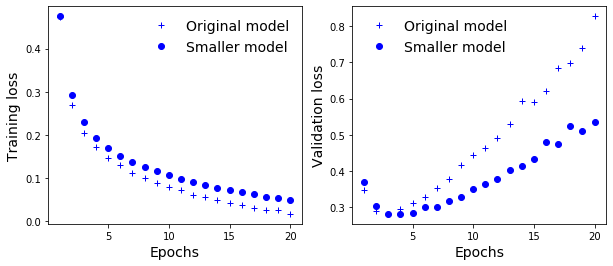

In [53]:
epochs=range(1, 21)
orig_val_loss=orig_hist.history['val_loss']
orig_train_loss=orig_hist.history['loss']
smaller_val_loss= smaller_model_hist.history['val_loss']
smaller_train_loss= smaller_model_hist.history['loss']

plt.figure(figsize=(10,4))

plt.subplot(121)
plt.plot(epochs, orig_train_loss, 'b+', label='Original model')
plt.plot(epochs, smaller_train_loss, 'bo', label='Smaller model')
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Training loss', fontsize=14)
plt.legend(fontsize=14, frameon=False)

plt.subplot(122)
plt.plot(epochs, orig_val_loss, 'b+', label='Original model')
plt.plot(epochs, smaller_val_loss, 'bo', label='Smaller model')
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Validation loss', fontsize=14)
plt.legend(fontsize=14, frameon=False)


plt.show()

In [54]:
mymodel_bigger=models.Sequential()
mymodel_bigger.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
mymodel_bigger.add(layers.Dense(512, activation='relu') )
mymodel_bigger.add(layers.Dense(1, activation='sigmoid') )

mymodel_bigger.compile(optimizer='rmsprop', loss='binary_crossentropy',
                       metrics=['acc'])


In [55]:
bigger_model_hist = mymodel_bigger.fit(x_train, y_train,
                        epochs=20,
                        batch_size=512,
                        validation_data=(x_test, y_test) )

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 14s 570us/step - loss: 0.4872 - acc: 0.8084 - val_loss: 0.2746 - val_acc: 0.8888
Epoch 2/20
25000/25000 [==============================] - 18s 711us/step - loss: 0.2209 - acc: 0.9125 - val_loss: 0.3595 - val_acc: 0.8490
Epoch 3/20
25000/25000 [==============================] - 16s 660us/step - loss: 0.1296 - acc: 0.9500 - val_loss: 0.3372 - val_acc: 0.8813
Epoch 4/20
25000/25000 [==============================] - 18s 705us/step - loss: 0.0651 - acc: 0.9784 - val_loss: 0.8757 - val_acc: 0.7454
Epoch 5/20
25000/25000 [==============================] - 18s 726us/step - loss: 0.0120 - acc: 0.9971 - val_loss: 2.0461 - val_acc: 0.7190
Epoch 6/20
25000/25000 [==============================] - 18s 733us/step - loss: 0.0640 - acc: 0.9902 - val_loss: 0.7050 - val_acc: 0.8795
Epoch 7/20
25000/25000 [==============================] - 15s 609us/step - loss: 0.0901 - acc: 0.9903 - val_loss: 0.

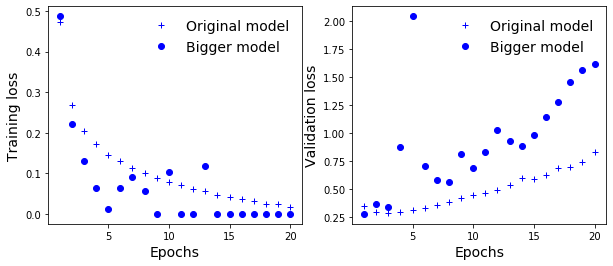

In [58]:
bigger_val_loss= bigger_model_hist.history['val_loss']
bigger_train_loss= bigger_model_hist.history['loss']

plt.figure(figsize=(10, 4))

plt.subplot(121)
plt.plot(epochs, orig_train_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_train_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Training loss', fontsize=14)
plt.legend(fontsize=14, frameon=False)

plt.subplot(122)
plt.plot(epochs, orig_val_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_val_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Validation loss', fontsize=14)
plt.legend(fontsize=14, frameon=False)

plt.show()

## Weight Regularization

In [61]:
from keras import regularizers

l2_model = models.Sequential()
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                        activation='relu', input_shape=(10000,)))
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                        activation='relu'))
l2_model.add(layers.Dense(1, activation='sigmoid'))

In [62]:
l2_model.compile(optimizer='rmsprop', 
                 loss='binary_crossentropy', metrics=['acc'])

In [63]:
l2_model_hist = l2_model.fit(x_train, y_train, 
                            epochs=20, batch_size=512, 
                            validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 7s 297us/step - loss: 0.4916 - acc: 0.8223 - val_loss: 0.3930 - val_acc: 0.8681
Epoch 2/20
25000/25000 [==============================] - 9s 353us/step - loss: 0.3145 - acc: 0.9046 - val_loss: 0.3318 - val_acc: 0.8894
Epoch 3/20
25000/25000 [==============================] - 6s 233us/step - loss: 0.2653 - acc: 0.9209 - val_loss: 0.3410 - val_acc: 0.8805
Epoch 4/20
25000/25000 [==============================] - 6s 244us/step - loss: 0.2470 - acc: 0.9259 - val_loss: 0.3360 - val_acc: 0.8838
Epoch 5/20
25000/25000 [==============================] - 7s 297us/step - loss: 0.2322 - acc: 0.9341 - val_loss: 0.3436 - val_acc: 0.8821
Epoch 6/20
25000/25000 [==============================] - 5s 215us/step - loss: 0.2205 - acc: 0.9379 - val_loss: 0.3528 - val_acc: 0.8780
Epoch 7/20
25000/25000 [==============================] - 5s 212us/step - loss: 0.2158 - acc: 0.9410 - val_loss: 0.3831 - 

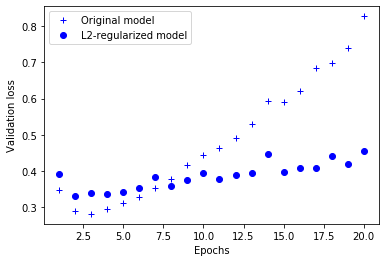

In [64]:
l2_model_val_loss = l2_model_hist.history['val_loss']

plt.plot(epochs, orig_val_loss, 'b+', label='Original model')
plt.plot(epochs, l2_model_val_loss, 'bo', label='L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [65]:
#We could also use the following regularizers.
from keras import regularizers

# L1 regularization
regularizers.l1(0.001)

# L1 and L2 regularization at the same time
regularizers.l1_l2(l1=0.001, l2=0.001)

## Adding Dropout

In [71]:
layer_output = np.random.randint(0, high=10, size=(4, 9))#, size=layer_output.shape)
print (layer_output)

[[8 0 8 0 1 2 4 9 5]
 [8 0 5 0 8 0 1 5 8]
 [9 2 5 2 4 2 4 0 1]
 [5 4 9 1 7 3 5 5 9]]


In [72]:
dpt_model = models.Sequential()
dpt_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(16, activation='relu'))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(1, activation='sigmoid'))

dpt_model.compile(optimizer='rmsprop', loss='binary_crossentropy', 
                  metrics=['acc'])


In [73]:
dpt_model_hist=dpt_model.fit(x_train, y_train, 
                            epochs=20, batch_size=512, 
                            validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 10s 403us/step - loss: 0.5950 - acc: 0.6804 - val_loss: 0.4466 - val_acc: 0.8630
Epoch 2/20
25000/25000 [==============================] - 8s 325us/step - loss: 0.4418 - acc: 0.8100 - val_loss: 0.3343 - val_acc: 0.8842
Epoch 3/20
25000/25000 [==============================] - 8s 301us/step - loss: 0.3533 - acc: 0.8613 - val_loss: 0.2898 - val_acc: 0.8901
Epoch 4/20
25000/25000 [==============================] - 9s 350us/step - loss: 0.2984 - acc: 0.8890 - val_loss: 0.2755 - val_acc: 0.8898
Epoch 5/20
25000/25000 [==============================] - 6s 222us/step - loss: 0.2568 - acc: 0.9076 - val_loss: 0.2788 - val_acc: 0.8905
Epoch 6/20
25000/25000 [==============================] - 6s 221us/step - loss: 0.2289 - acc: 0.9202 - val_loss: 0.2878 - val_acc: 0.8884
Epoch 7/20
25000/25000 [==============================] - 6s 248us/step - loss: 0.2060 - acc: 0.9291 - val_loss: 0.3088 -

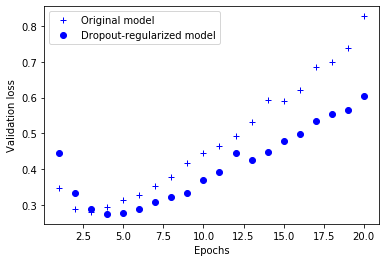

In [74]:
dpt_model_val_loss = dpt_model_hist.history['val_loss']

plt.plot(epochs, orig_val_loss, 'b+', label='Original model')
plt.plot(epochs, dpt_model_val_loss, 'bo', label='Dropout-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()